# Restricted Boltzmann machine test

Little test of the implemented restricted Boltzmann machine to see wether the bars and strips can be learned.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random as rd
from RestrictedBoltzmannMachine import RestrictedBoltzmannMachine

In [2]:
def make_bars_and_stripes(size=(10,10)):
    # makes a sample dataset
    direction = rd.choice([0, 1])
    if direction == 0:
        M = np.kron(np.random.binomial(1, 0.5, size=(size[0], 1)), np.ones((1, size[1])))
    else:
        M = np.kron(np.ones((size[0], 1)), np.random.binomial(1, 0.5, size=(1, size[1])))
    return M.reshape((1, -1))
    
def show(vector, size=(10, 10)):
    matrix = vector.reshape(size)
    plt.imshow(matrix, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
def noise(vector, fraction=0.025):
    return (vector + np.random.binomial(1, fraction, size=vector.size)) % 2

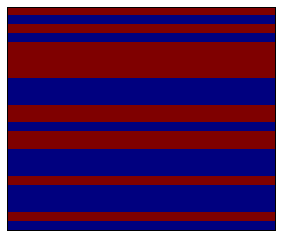

In [3]:
size = (25, 30)
M = make_bars_and_stripes(size)
show(M, size)

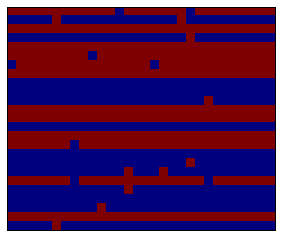

In [4]:
M_noisy = noise(M)
show(M_noisy, size)

Make a dataset

In [5]:
dataset = np.concatenate([noise(make_bars_and_stripes(), 0) for i in range(1000)], axis=0)

In [6]:
n_hidden = 100

In [7]:
rbm = RestrictedBoltzmannMachine(n_visible=100, n_hidden=n_hidden)

In [8]:
error = rbm.train_C1(dataset, 0.01, iterations=1000)

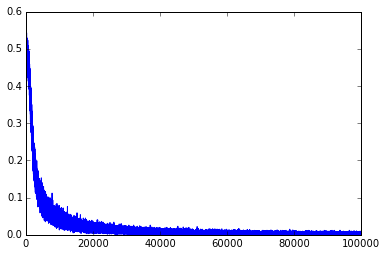

In [9]:
plt.plot(error)

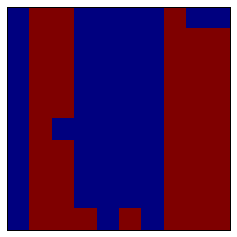

In [13]:
instance = noise(make_bars_and_stripes(), 0.05)
show(instance)

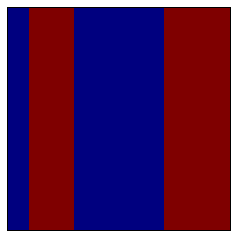

In [14]:
reconstruction = rbm.reconstruct(instance)
show(reconstruction)

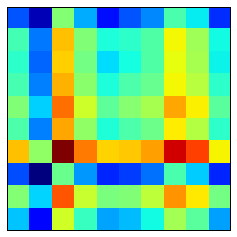

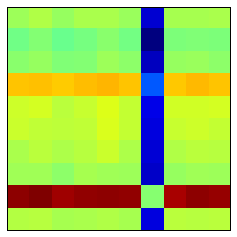

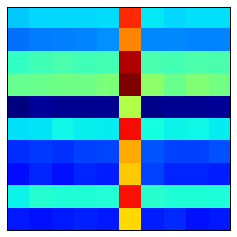

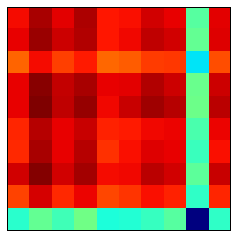

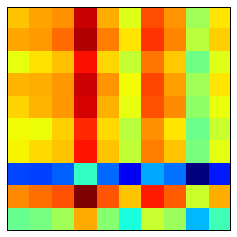

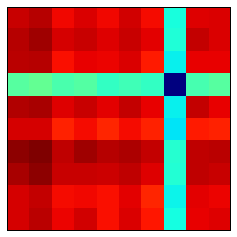

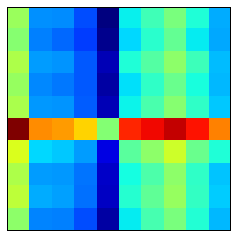

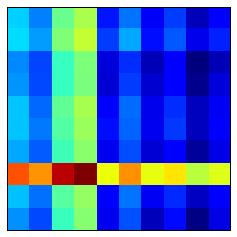

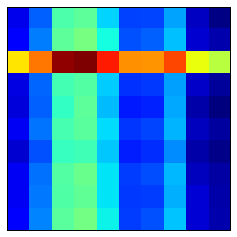

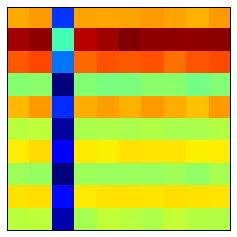

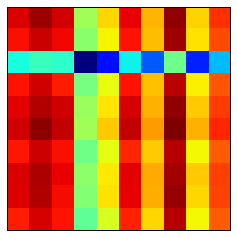

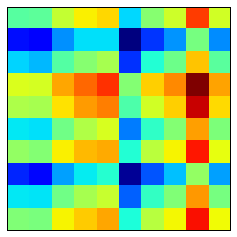

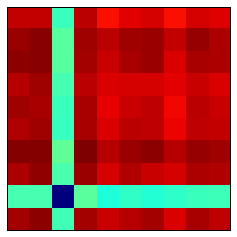

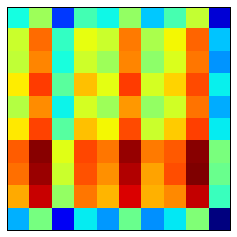

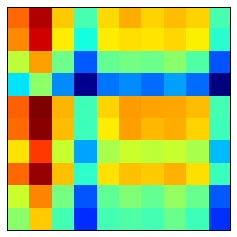

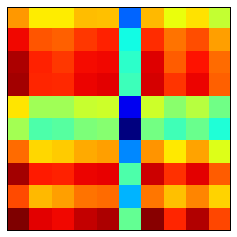

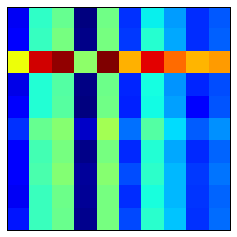

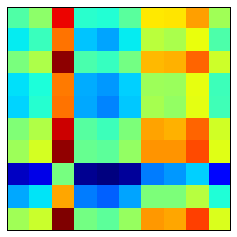

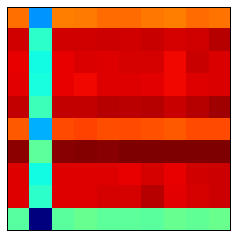

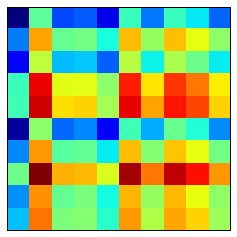

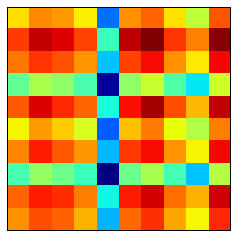

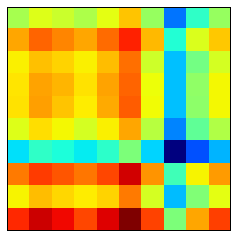

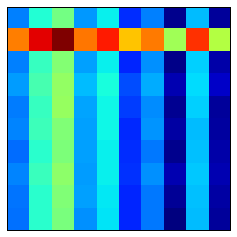

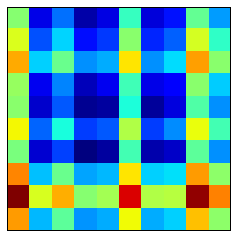

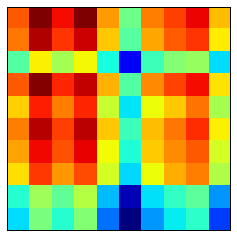

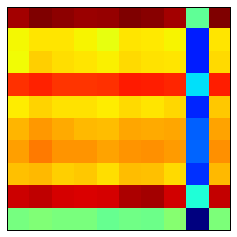

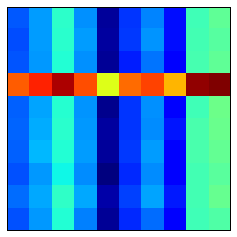

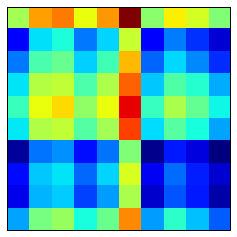

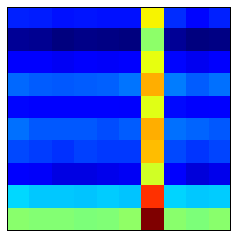

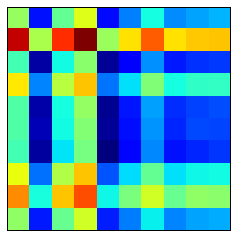

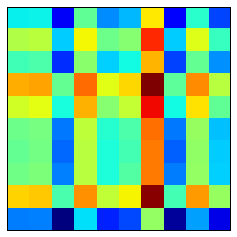

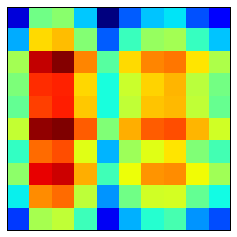

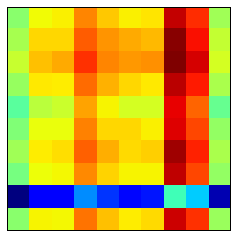

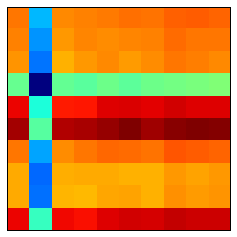

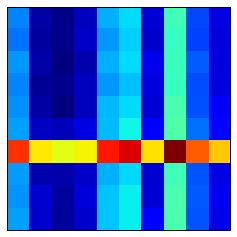

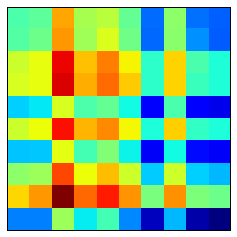

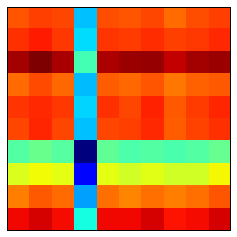

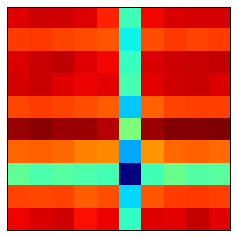

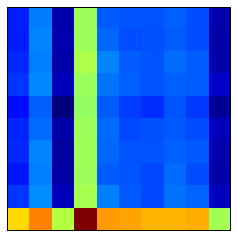

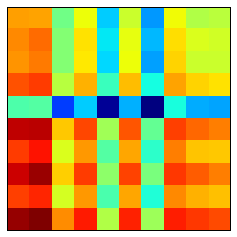

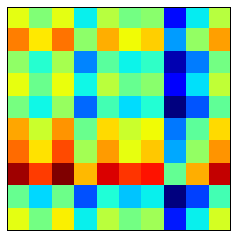

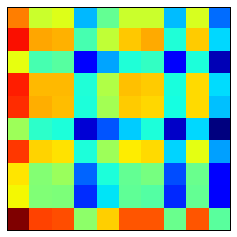

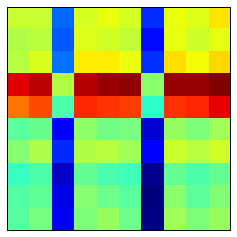

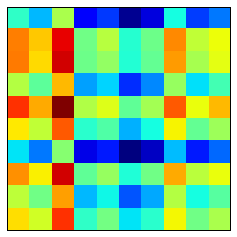

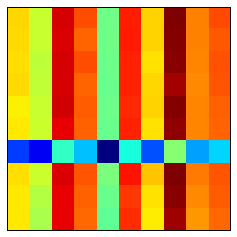

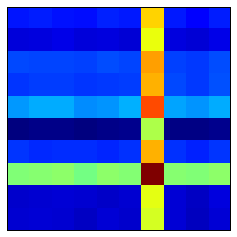

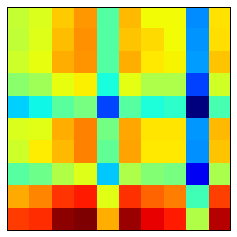

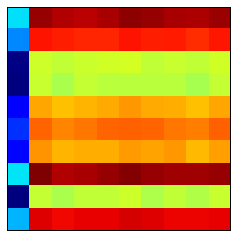

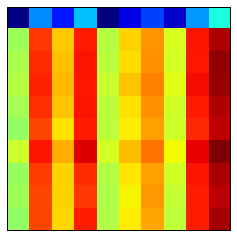

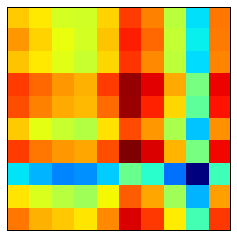

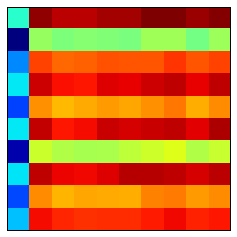

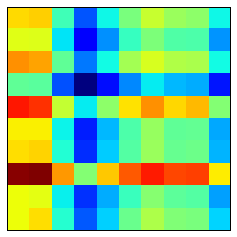

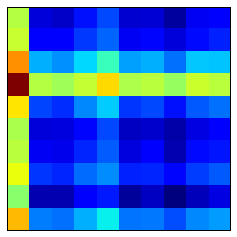

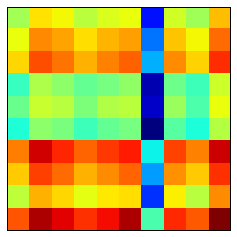

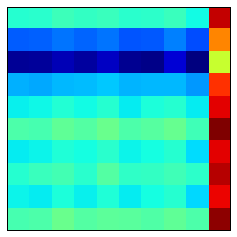

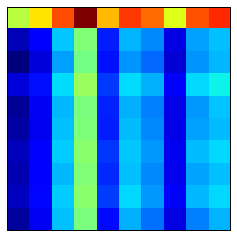

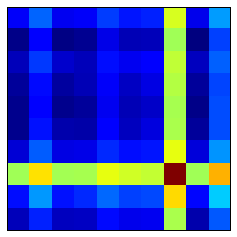

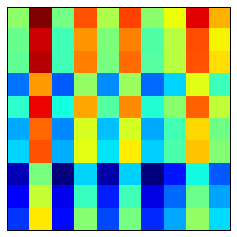

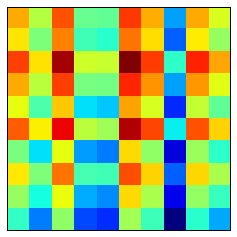

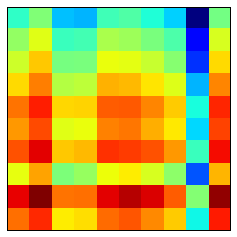

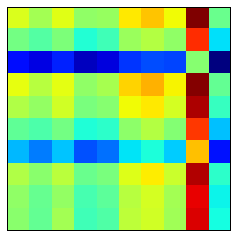

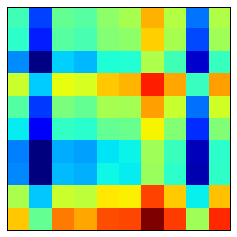

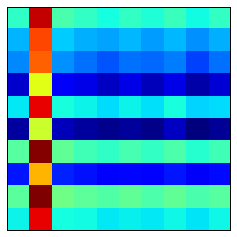

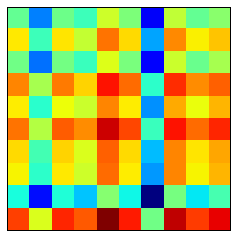

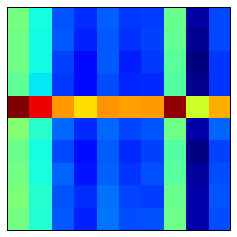

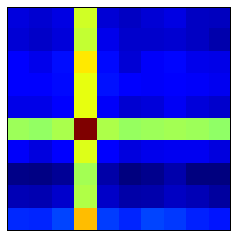

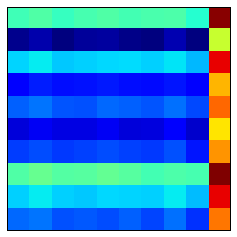

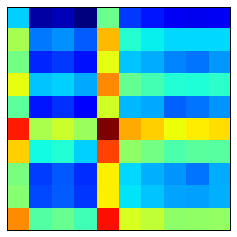

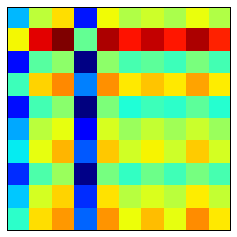

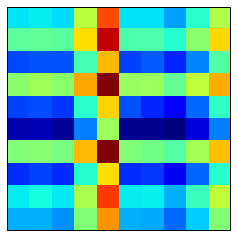

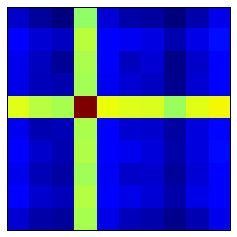

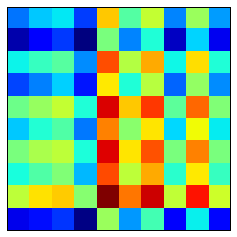

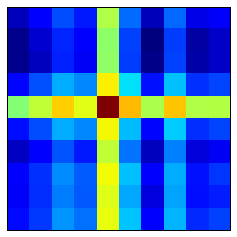

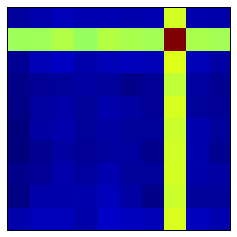

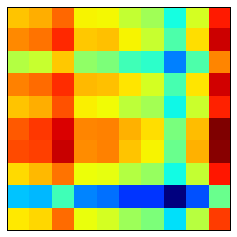

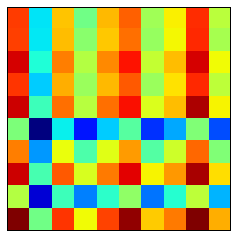

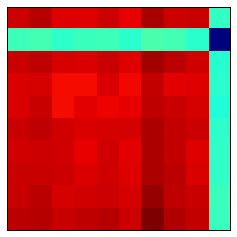

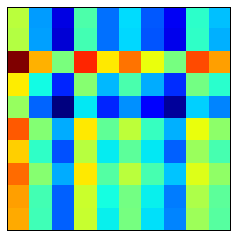

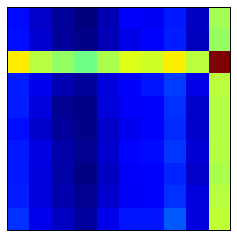

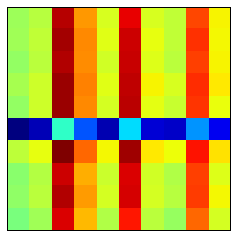

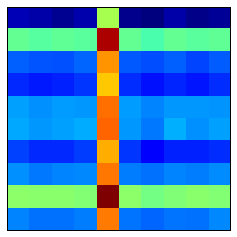

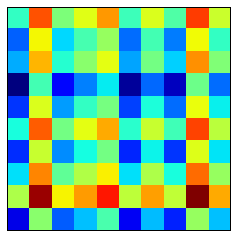

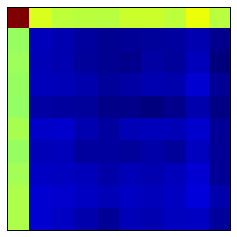

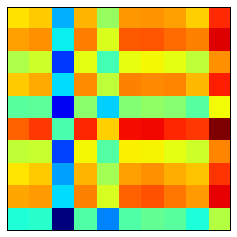

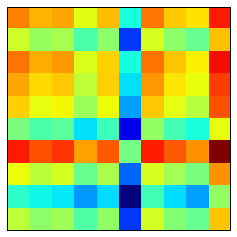

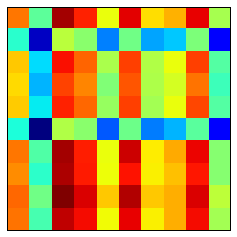

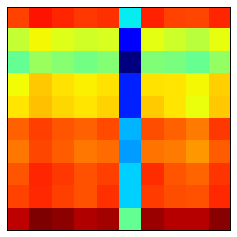

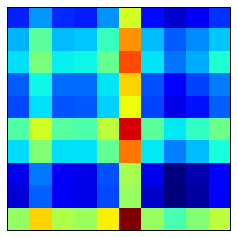

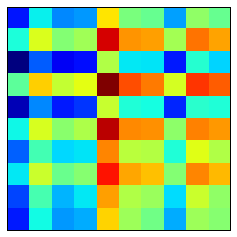

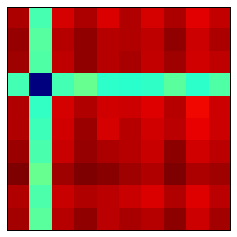

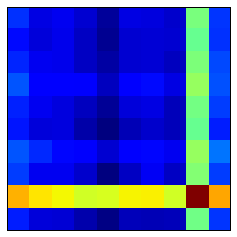

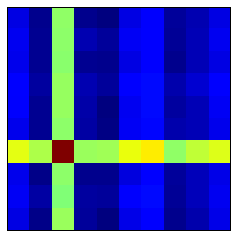

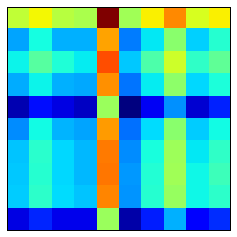

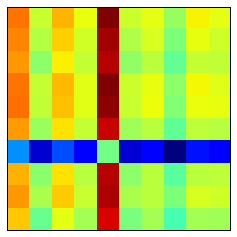

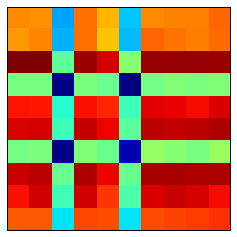

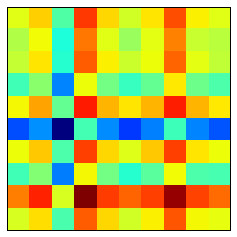

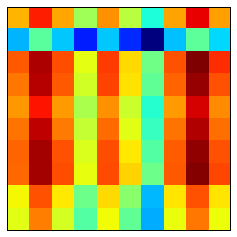

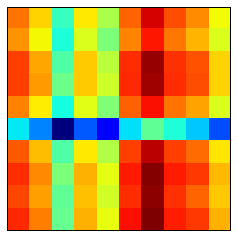

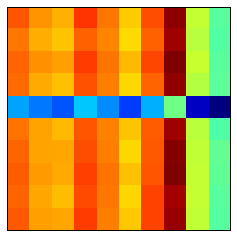

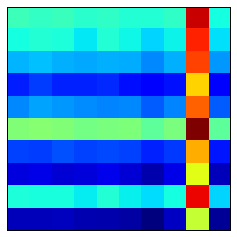

In [12]:
for i in range(n_hidden):
    show(rbm._weights[:, i])